# Увеличение выручки интернет магазина

## Исследование исходных данных

### Загрузка данных

Импортируем необходимые для работы библиотеки

In [1]:
import pandas as pd
from scipy import stats as st
import numpy as np
import datetime as dt
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

Загружаем данные в Датафрейм

In [2]:
orders = pd.read_csv('/datasets/orders.csv', sep=',') # Данные о заказах

In [3]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv',sep=',') # Данные о гипотезах

In [4]:
visitors = pd.read_csv('/datasets/visitors.csv', sep=',') # Данные о посетителях

Выведем первые 5 строк каждого датафрейма. Затем посмотрим на информацию о них и проверим на наличие пропусков и дубликатов

**Заказы**

In [5]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


Для датафрейма с заказами можно сделать выводы:
* Судя по количсевту строк - пропусков в данных нет
* `date` имеет тип данных `object`. Переведем его в тип `datetime`

In [7]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d') # Для каждого элемента применяем перевод в тип данных datetime
)

**Гипотезы**

In [8]:
hypothesis.head()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


In [9]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Првиедем к нижнему ригстру наименование столбцов

In [10]:
hypothesis.columns = hypothesis.columns.str.lower() #Приведение названия столбцов к нижнему регситру

In [11]:
hypothesis.head()

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


С данными все впорядке

**Посетители**

In [12]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [13]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Аналогично Фрейму с заказами - необходимо перевести тип данных `date` из `object` в `datetime`

In [14]:
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')# Для каждого элемента применяем перевод в тип данных datetime
)

**Количесвто групп тестирования**

In [15]:
len(visitors['group'].unique())# Количсевто групп в Посетителях

2

In [16]:
len(orders['group'].unique())# Количсевто групп в Заказах

2

Количество групп в обоих случаях - ***2***

**Период проведения исследвования**

In [17]:
print('Начальная дата исследования', visitors['date'].min())

Начальная дата исследования 2019-08-01 00:00:00


In [18]:
print('Конечная дата исследования', visitors['date'].max())

Конечная дата исследования 2019-08-31 00:00:00


**Количество пользоватей в группах**

In [19]:
orders.groupby('group').agg({'visitorId' : 'nunique'})

,visitorId
group,
A,503
B,586


В группе А - 503 участника

В группе В - 586 участников

**Пересекающиеся пользователи**

In [20]:
order_cross = orders.groupby('visitorId').agg({'group': 'nunique'})# Группируем пользоватей с подсчетом уникальных групп для каждого

In [21]:
print('Количество пересекающихся пользователей по группам',order_cross[order_cross['group'] > 1].count())

Количество пересекающихся пользователей по группам group    58
dtype: int64


### Вывод

Данныем подготовлены к дальнейшей работе

## Приоритизация Гипотиз

### Приоритизации гипотез методом ICE

Из данных в Датафрейме с гипотезами, получим приоритезацию методом ICE 

In [22]:
hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis[['hypothesis','ICE']].sort_values('ICE',ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.200000
0,"Добавить два новых канала привлечения трафика,...",13.333333
7,Добавить форму подписки на все основные страни...,11.200000
6,Показать на главной странице баннеры с актуаль...,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,7.000000
1,"Запустить собственную службу доставки, что сок...",2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",1.333333
3,"Изменить структура категорий, что увеличит кон...",1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",1.000000


Стоит выделить 3 гипотезы, заметно отличающиеся по уровню от остальных: Номера 8, 0, 7

### Приоритизации гипотез методом RICE

Аналогично `ICE` Применим метод `RICE`

In [23]:
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis[['hypothesis','RICE']].sort_values('RICE',ascending=False)

,hypothesis,RICE
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


Выделим 4 гипотезы: Номера 7, 2, 0, 6. Среди них есть явный лидер - это гипотеза номер 7.

### Вывод

Методы RICE и ICE связаны между собой. Их основное отличие - это наличие параметра, описывающего охват аудитории - `REACH`
Согласно методу ICE - гипотезы 8, 0, 7 имеют большую значимость, но из-за наибольшего охвата аудитории - гипотеза номер 7 заметно выше всех остальных.

Гипотеза, на которую стоит обратить внимание:
***Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей***

## Анализ A/B - теста

### Подготовка данных

In [24]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'revenue', 'visitors']

print(cumulativeData.head(5)) #Выводим верхние 5 значение Кумулятивных данных

        date group  orders  revenue  visitors
0 2019-08-01     A      24   148579       719
1 2019-08-01     B      21   101217       713
2 2019-08-02     A      44   242401      1338
3 2019-08-02     B      45   266748      1294
4 2019-08-03     A      68   354874      1845


### График кумулятивной выручки по группам

Построим графики кумулятивной выручки по дням и группам A/B-тестирования:

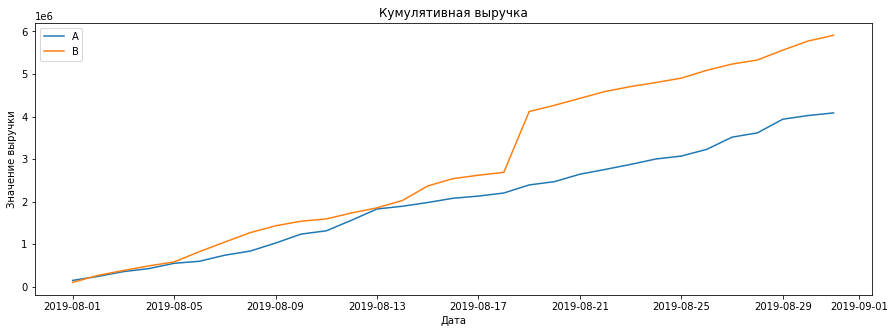

In [25]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.rcParams["figure.figsize"] = [15, 5]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('Кумулятивная выручка')
plt.xlabel('Дата')
plt.ylabel('Значение выручки')
plt.legend(); 

**Выводы**

График выручки растет. При этом группа В имеет резкий скачек в промежутке между 17 и 21 августа

### График кумулятивного среднего чека по группам

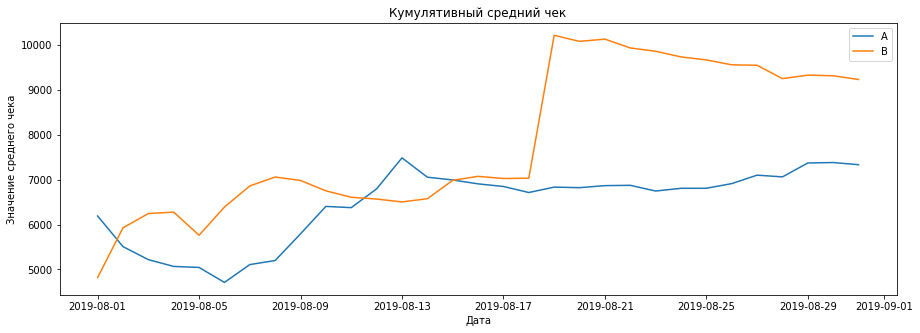

In [26]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.rcParams["figure.figsize"] = [15, 5]
plt.title('Кумулятивный средний чек')
plt.xlabel('Дата')
plt.ylabel('Значение среднего чека')
plt.legend(); 

**Выводы**

Выручки стабилизируется к концу наблюдения. Но при этом, как и в пукте выше, наблюдается резкий скачок в группе B. Это может сигнализировать о появившемся в выборке дорогого Клиента. Который купил одну или более дорогую покупку

###  График относительного изменения кумулятивного среднего чека группы B к группе A

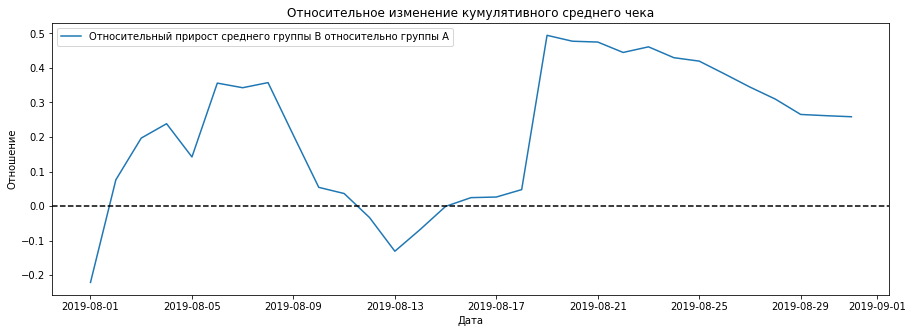

In [27]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1,label="Относительный прирост среднего группы B относительно группы A")
plt.title('Относительное изменение кумулятивного среднего чека')
plt.xlabel('Дата')
plt.ylabel('Отношение')
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.legend(); 



**Выводы**

Согласно данным графика - в некольких точках присутствуют резкие скачки. Это лишний раз доказывает наличие дорогих заказов

###  График кумулятивной конверсии по группам

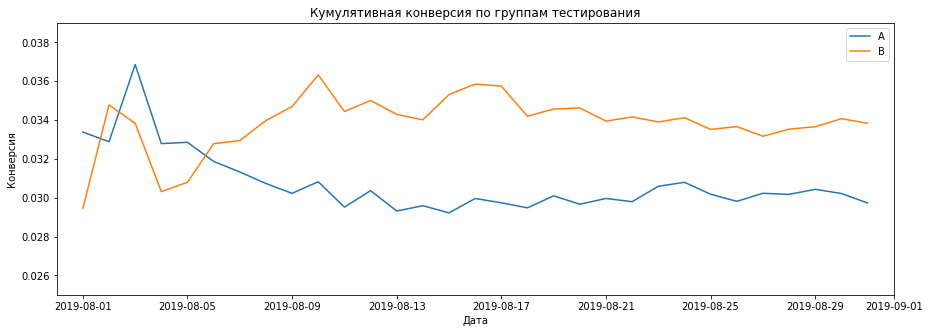

In [28]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('Кумулятивная конверсия по группам тестирования')
plt.xlabel('Дата')
plt.ylabel('Конверсия')

# задаем масштаб осей
plt.axis([(cumulativeData['date'].min()-timedelta(days=1)),(cumulativeData['date'].max()+timedelta(days=1)),0.025, 0.039])
plt.legend(); 

 

В начале исследования данные колебались, но к конце стабилизировались плюс\минус симметрично относительно одного значения. При этом Группа В имеет небольшой всплеск  районе 17 августа. Также группа В ощутима по значению кумулятивной конверсии относительно группы А 

###  График относительного изменения кумулятивной конверсии группы B к группе A. 

(18108.0, 18140.0, -0.15, 0.25)

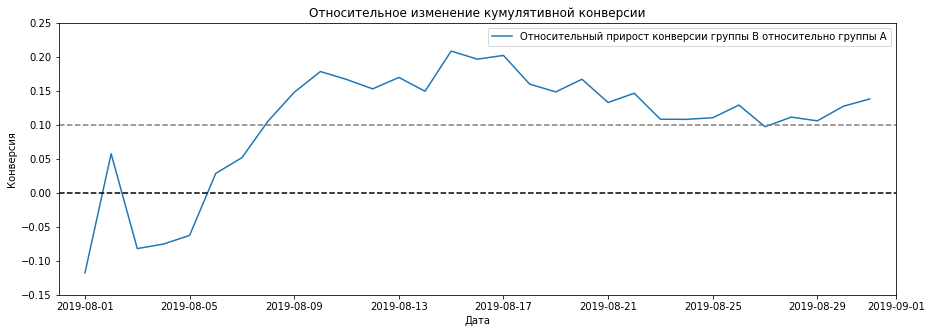

In [29]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.title('Относительное изменение кумулятивной конверсии')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.legend(); 

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.axis([(cumulativeData['date'].min()-timedelta(days=1)),(cumulativeData['date'].max()+timedelta(days=1)),-0.15, 0.25]) 

Конверсия группы В в начале исследования ловольно сильно колебалась. Но с 6-7 августа начала расти. К концу исследуемого периода конверсия группы В значительно превышает группу А. Но будет проверить значения без аномального приророста выручки группы В

### Точечный график количества заказов по пользователям

Для начала сгруппируем данные по уникальным заказам из датафрейма orders

In [30]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['visitorId', 'orders']

Теперь строим график количсевта пользователей

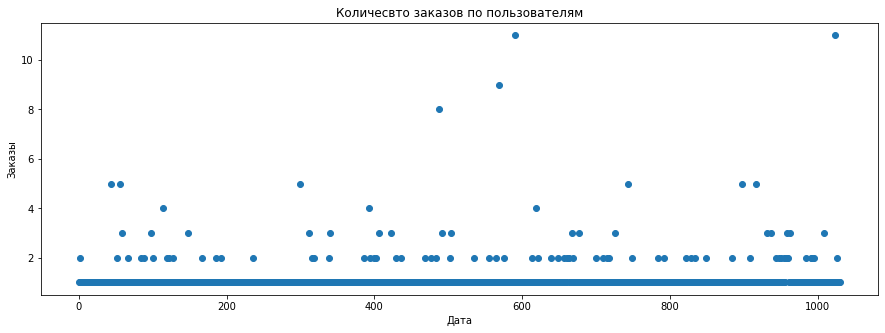

In [31]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders']) 
plt.title('Количесвто заказов по пользователям')
plt.xlabel('Дата')
plt.ylabel('Заказы');

Стоит выделить пользователей с заказами не более 4. Проверим их долю

###  95-й и 99-й перцентили количества заказов на пользователя

In [32]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

Не более чем 5% пользователй делали более 2х заказов. И не более 1% процента сделали более 4 заказов
Разумным выглядит отделить пользователей, которые сделали не более 3х заказов

### Точечный график стоимостей заказов

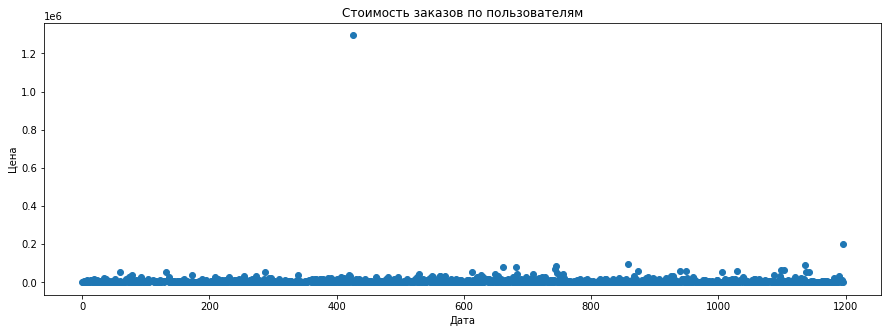

In [33]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.title('Стоимость заказов по пользователям')
plt.xlabel('Дата')
plt.ylabel('Цена');

Согласно графику, всего 2 заказа заметно выделются из общего числа. Проверим данные на 95-й и 99-й перцентили

### 95-й и 99-й перцентили стоимости заказов

In [34]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Согласно результатам, не более 5% всех заказов превышали стоимость в 28000 у.е., а также не более 1% превышали стоимость в 58233 у.е.
Судя по графикам, показанным в прошлым пукте, выглядит разумным отделить данные по 99% перцентилю, так как значение в 59000 у.е. даже не видно на графике.

###  Статистическая значимость различий в конверсии между группами по «сырым» данным

Для начала объедим все известные данные в один фрейм

In [35]:
# Разделяем посетителей по группам А и В
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']] # Выделяем группу А из пользователей 
visitorsADaily.columns = ['date', 'visitorsPerDateA']
#Создаем фрейм с кумулятивными данными по посетителям исходя из ранее получено фрейма по группе А
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

# Аналогичную процеду делаем для пользователей группы В
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

# Теперь для групп А и В создаем фреймы с заказами, сгруппированные по дате и с подсчетам суммы выручки и количсевта заказов по группам
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5))

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              24           148579              21   
1 2019-08-02              20            93822              24   
2 2019-08-03              24           112473              16   
3 2019-08-04              16            70825              17   
4 2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61               38

Так как выборки относительно небольшие, выборки являются независимыми. Будем использовать критерий Манна-Уитни. Он имеет достаточно большую мощность выборки. 

Зададим уровень значимости в 5%

In [36]:
alpha = .05 # Критерий значимсоти

Сформулируем гипотезы. 

Нулевая гипотеза: ***различий в средней конверсии между группами нет.***
Альтернативная гипотеза: ***различия в средней конверсии между группами есть.***

In [37]:
# Создадим фрейм где пользвоатели делали хотя бы 1 заказ для 2х групп
# Группа А
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']
# Грпуппа В
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

#Создадим переменные, где пользователям из разных групп будет соответствовать количество заказов. 
#Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить 
# выборки к проверке критерием Манна-Уитни.
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("P-value: {0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

print("Относительный прирост конверсии группы B по отношению к группе A: {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))
if st.mannwhitneyu(sampleA, sampleB)[1] < alpha:
    print('По неочищенным данным в конверсии групп A и B - разница является статистически значимой')
else:
    print('По неочищенным данным  - различий в конверсии групп A и B нет')

P-value: 0.017
Относительный прирост конверсии группы B по отношению к группе A: 0.138
По неочищенным данным в конверсии групп A и B - разница является статистически значимой


**Вывод**

Согласно результатам теста, разница конверсий между группами с неочищенными данными - ***статистически значимая***, а значит, ***отвергаем нулевую гипотезу***

Относительная разница средней конверсии групп А и В составляет 13%. 

###  Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Сформулируем гипотезы. Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть.

In [38]:
print('P-value:{0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительный прирост среднего чека группы B по отношению к группе A: {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))
if st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1] < alpha:
    print('По неочищенным данным в среднем чеке групп A и B - разница является статистически значимой')
else:
    print('По неочищенным данным  - различий в конверсии групп A и B нет')

P-value:0.729
Относительный прирост среднего чека группы B по отношению к группе A: 0.259
По неочищенным данным  - различий в конверсии групп A и B нет


**Вывод**

Соглассно тесту, статистичсекой разницы в среднем чеке между группами ***нет***. Оставляем ***нулевую гипотезу***

При этом относительным прирост выручки составляет порядка 25%. Будем в дальнейшем исследовать эти показатели, но уже по отфильтрованным данным

### Статистическая значимость различий в конверсии между группами по «очищенным» данным

Исходя из прерыдыщих исследований, при поиске 99 и 95 перцентия, было выявленр, что границей фильтра значений стоит выбрать:
* 4 заказа
* стоимость заказа 59000

Сформулируем гипотезы. 

Нулевая гипотеза: ***различий в средней конверсии между "чистыми" группами нет.***
Альтернативная гипотеза: ***различия в средней конверсии между "чистыми" группами есть.***

Отфильтруем пользователей, которые выделяются и найдем их количество

In [39]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['orders'], [95, 99])[1]]['visitorId'], #Фильтруем группу А с заказами более 3
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['orders'], [95, 99])[1]]['visitorId'], #Фильтруем группу В с заказами более 3
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], [95, 99])[1]]['visitorId'] #Фильтруем суммы заказов более 59000
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

1099     148427295
949      887908475
744      888512513
1103    1164614297
1136    1307669133
Name: visitorId, dtype: int64
15


Согласно результату - всего 15 пользователй выбиваются из общего чилса. Отфильтруем этих пользователей

In [40]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))#Если пользователь НЕ в списке фильтра
        ]['orders'],
        pd.Series( #Добавляем заказы и заполняем 0 пропуски
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [41]:
print('P-Value:{0:.3f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный прирост конверсии группы В по отношени к группе А: {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))
if st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1] < alpha:
    print('По фильтрованным данным в конверсии групп A и B - разница является статистически значимой')
else:
    print('По фильтрованным данным  - различий в конверсии групп A и B нет')

P-Value:0.014
Относительный прирост конверсии группы В по отношени к группе А: 0.153
По фильтрованным данным в конверсии групп A и B - разница является статистически значимой


**Вывод**

Согласно "чистым" данным, разница коверсий все еще является ***статитсически значимой*** и ***отергаем нулевую гипотизу***

###  Различий в среднем чеке заказа между группами по «очищенным» данным

Сформулируем гипотезы. Нулевая гипотеза: **различий в среднем чеке по "чистым" данным между группами нет.** Альтернативная гипотеза: **различия в среднем чеке "чистым" данным между группами есть.**

In [42]:
st_pvalue =st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)), #также как и в прошлом пунтке, фильтруем по наличию пользователя в списке фильтрации
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]

print('P-value: {0:.3f}'.format(st_pvalue))

st_def=(
    orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
)

print("Относительный прирост {0:.3f}".format(st_def))
if st_pvalue < alpha:
    print('По фильтрованным данным среднем чеке групп A и B - разница является статистически значимой')
else:
    print('По фильтрованным данным  - различий в среднем чеке групп A и B нет')

P-value: 0.851
Относительный прирост -0.006
По фильтрованным данным  - различий в среднем чеке групп A и B нет


**Вывод**

Согласно результатам - статистичсекой разницы между группами ***нет***

## Выводы

Полученные результаты:
* Статистичсекая разница конверсий двух групп по "сырым" и "чистым" данным есть. Отношение средней конверсии груп порядка 15%
* Статистичсекая разница между средними чеками по "сырым" и "чистым" данным отсуствует в обоих случаях. 
* График различия конверсии между группами сообщает, что результаты группы B лучше группы A.  

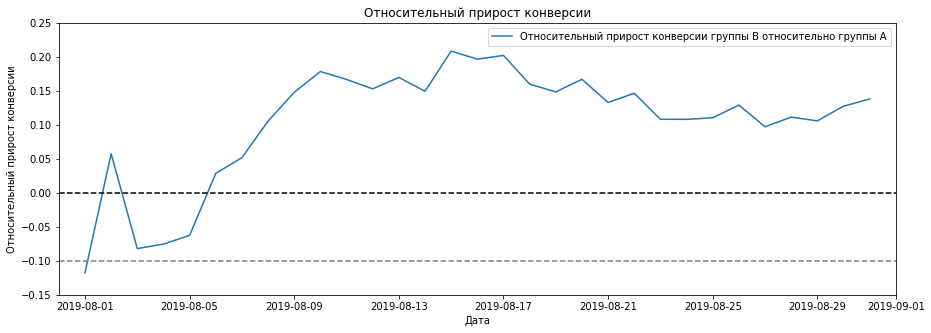

In [43]:
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.xlabel('Дата')
plt.ylabel('Относительный прирост конверсии')
plt.title('Относительный прирост конверсии')
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axis([(cumulativeData['date'].min()-timedelta(days=1)),(cumulativeData['date'].max()+timedelta(days=1)),-0.15, 0.25]); 

* Прирост среднего чека в группе В заметн0 выше, чем в группе А, но эти данные расходятся с фильррованными значениями. Срений чек групп А и В схож, по фильтрованным данным

***Вывод***

Исходя из обнаруженных фактов, тест следует остановить и признать его успешным - **Группа В продесомстрировала лучшие результаты**. По графикам относительной коверсии видно, что результат группы В зафиксирован. При этом прирост коверсии признан статистически значимым. Как по сырым, так и по фильтрованным данным. 